In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
import streamlit as st
from sklearn import metrics
from sklearn.metrics import mean_squared_error,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from mpl_toolkits import mplot3d
pd.options.display.max_columns = None

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

# Visualize Tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from os import system

# Display settings
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

In [2]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!unzip ngrok-stable-linux-amd64.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
get_ipython().system_raw('./ngrok http 8501 &')

In [5]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

'curl' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
df_train = pd.read_csv("train_data_evaluation_part_2.csv")
df_train.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.shape

(82580, 30)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82580 entries, 0 to 82579
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            82580 non-null  int64  
 1   ID                    82580 non-null  int64  
 2   Nationality           82580 non-null  object 
 3   Age                   78834 non-null  float64
 4   DaysSinceCreation     82580 non-null  int64  
 5   AverageLeadTime       82580 non-null  int64  
 6   LodgingRevenue        82580 non-null  float64
 7   OtherRevenue          82580 non-null  float64
 8   BookingsCanceled      82580 non-null  int64  
 9   BookingsNoShowed      82580 non-null  int64  
 10  BookingsCheckedIn     82580 non-null  int64  
 11  PersonsNights         82580 non-null  int64  
 12  RoomNights            82580 non-null  int64  
 13  DaysSinceLastStay     82580 non-null  int64  
 14  DaysSinceFirstStay    82580 non-null  int64  
 15  DistributionChannel

In [9]:
df_train.isnull().sum()

Unnamed: 0                 0
ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [10]:
df_train.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,82580.000000,82580.000000,78834.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000,82580.000000
mean,41289.500000,41290.500000,45.468554,459.138157,66.557205,300.457373,67.890023,0.002047,0.000642,0.798402,4.667958,2.369411,405.935457,408.245071,0.047518,0.001429,0.000254,0.000884,0.002809,0.001732,0.012812,0.351671,0.142771,0.000303,0.003548,0.000121,0.088060
std,23838.936952,23838.936952,16.526276,311.309295,87.928995,373.337007,114.496223,0.067177,0.029725,0.696880,4.562507,2.281758,346.502341,347.247127,0.212744,0.037774,0.015945,0.029719,0.052930,0.041577,0.112463,0.477495,0.349841,0.017397,0.059460,0.011004,0.283384
min,0.000000,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20644.750000,20645.750000,34.000000,183.000000,0.000000,66.400000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,42.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41289.500000,41290.500000,46.000000,406.000000,30.000000,234.000000,39.000000,0.000000,0.000000,1.000000,4.000000,2.000000,378.000000,388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61934.250000,61935.250000,57.000000,728.000000,104.000000,403.800000,88.000000,0.000000,0.000000,1.000000,7.000000,4.000000,698.000000,705.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82579.000000,82580.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,1104.000000,1186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
for column in df_train.columns:
    if df_train[column].dtype == 'object':
        print(column.upper(),': ',df_train[column].nunique())
        print(df_train[column].value_counts().sort_values())
        print('\n')

NATIONALITY :  188
NPL        1
WSM        1
GUF        1
PCN        1
MMR        1
VCT        1
PNG        1
VIR        1
TKM        1
TON        1
FJI        1
NRU        1
YEM        1
IOT        1
KNA        1
BHS        1
SOM        1
DMA        1
KIR        1
SWZ        1
GIN        1
GNQ        1
JEY        1
FRO        1
FLK        1
ZWE        1
NCL        1
MRT        1
LCA        1
GUY        1
TZA        1
PYF        1
TMP        1
TCD        2
MWI        2
CYM        2
NIC        2
WLF        2
PRI        2
ERI        2
SLE        2
UZB        2
TJK        2
LAO        2
SDN        2
MDG        3
ATA        3
COM        3
GIB        3
ABW        3
AIA        3
SPM        3
ATG        3
ASM        3
BWA        3
STP        3
MDV        3
GHA        3
SLV        3
UMI        3
ETH        3
BEN        3
SMR        4
MCO        4
HKG        4
MNE        4
CAF        4
TGO        4
COD        4
MLI        4
GAB        4
JAM        4
QAT        4
HTI        4
CIV        5
OMN   

In [12]:
df_train['BookingsCanceled'].value_counts()

0    82462
1       92
2       12
3        8
4        5
9        1
Name: BookingsCanceled, dtype: int64

In [13]:
df_train['BookingsNoShowed'].value_counts()

0    82536
1       36
2        7
3        1
Name: BookingsNoShowed, dtype: int64

In [14]:
df_train['BookingsCheckedIn'].value_counts()

1     61737
0     19394
2      1141
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64

In [15]:
for column in df_train.columns:
    if df_train[column].dtype != 'object':
        mean = df_train[column].mean()
        df_train[column] = df_train[column].fillna(mean)    
        
df_train.isnull().sum() 

Unnamed: 0              0
ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

2022-08-26 21:49:20.735 
  command:

    streamlit run c:\Users\Hp\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


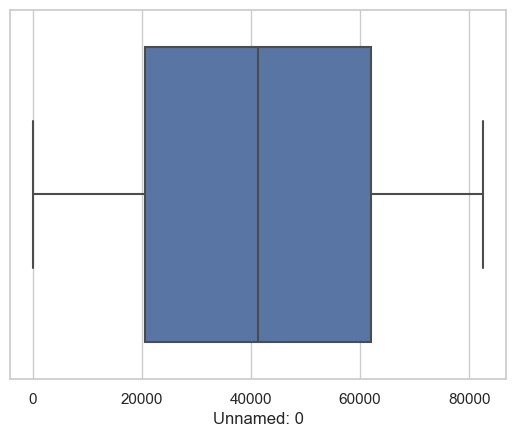

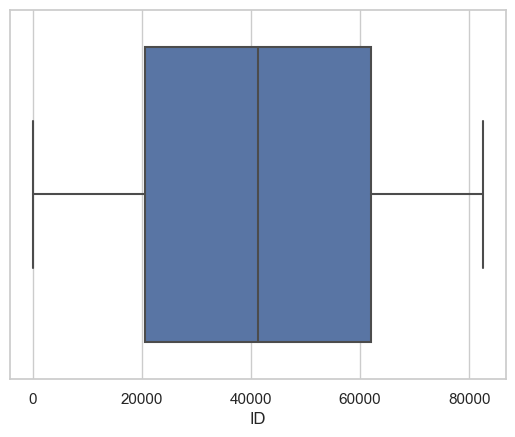

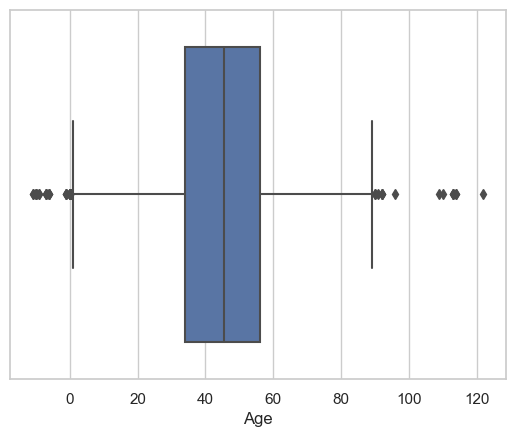

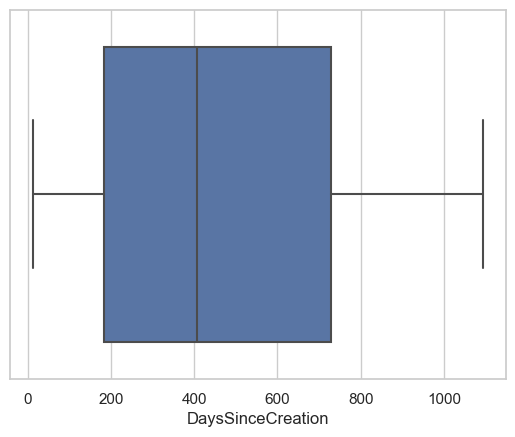

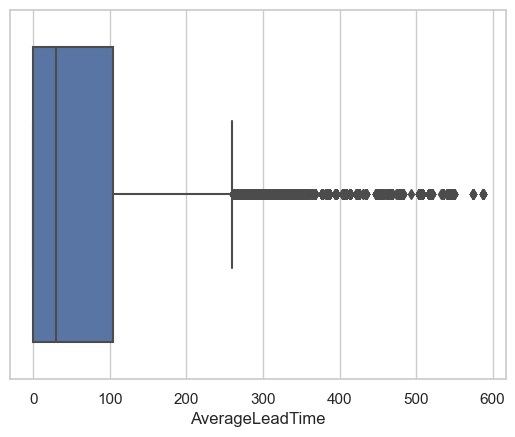

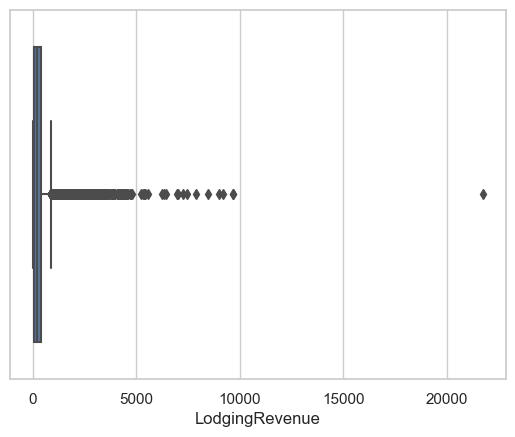

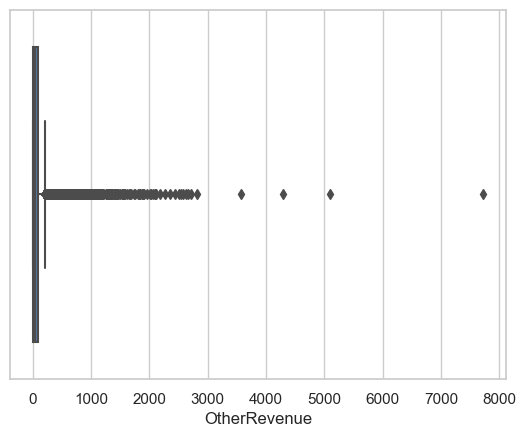

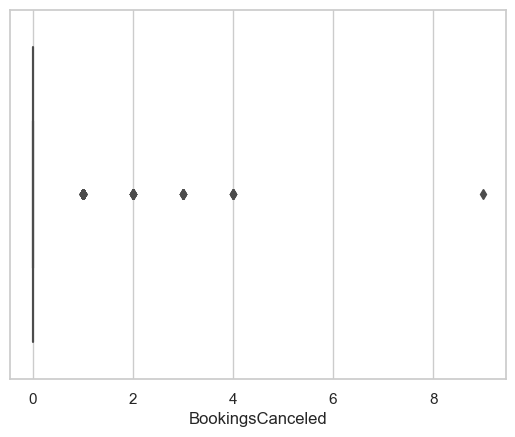

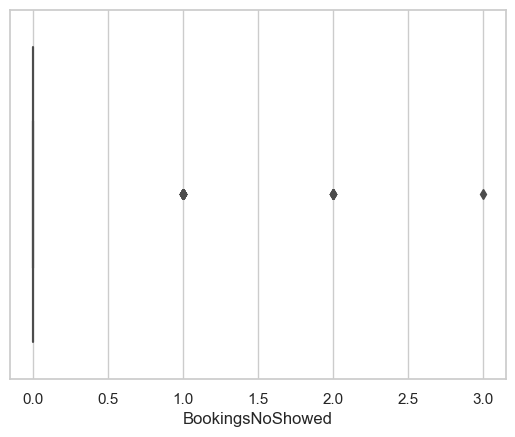

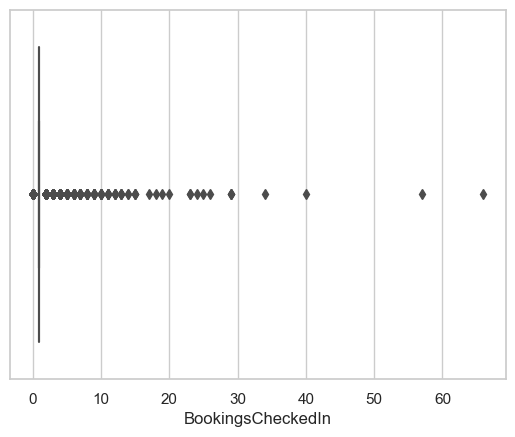

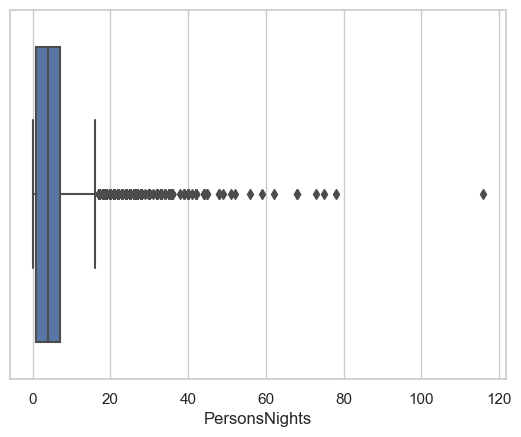

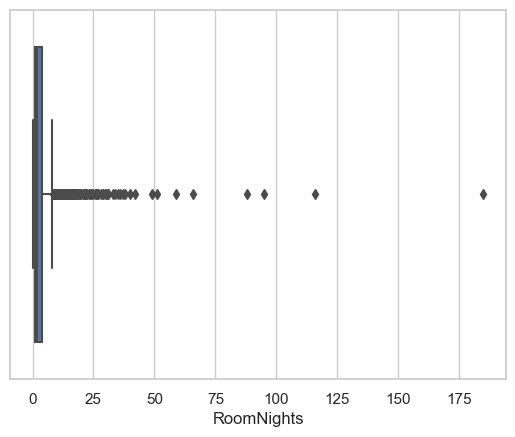

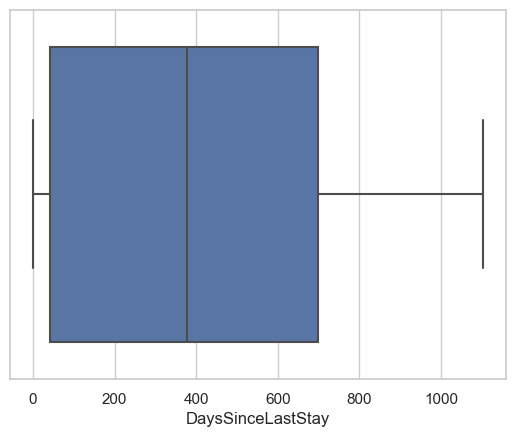

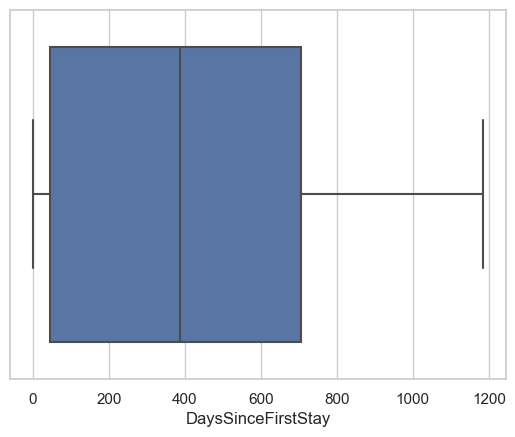

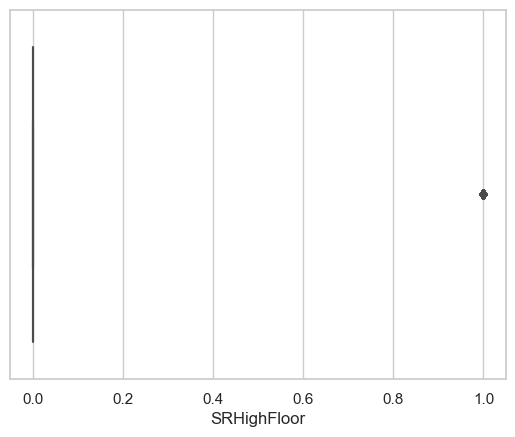

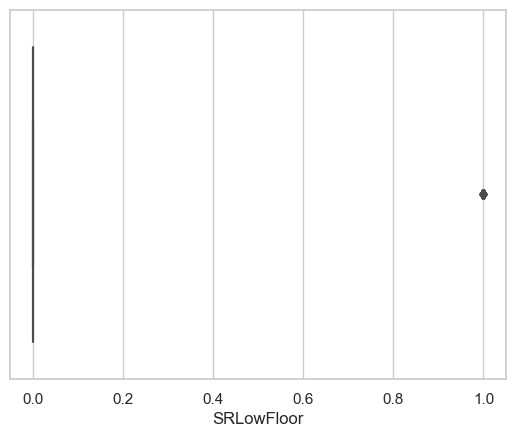

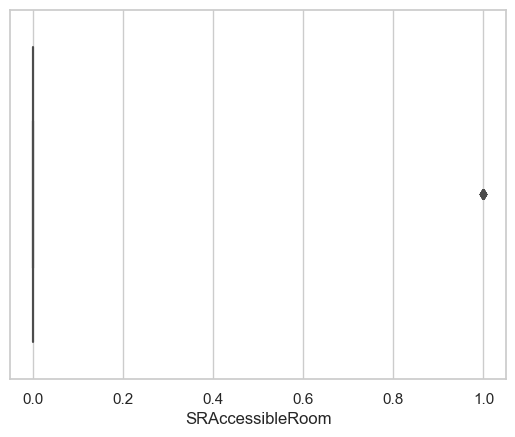

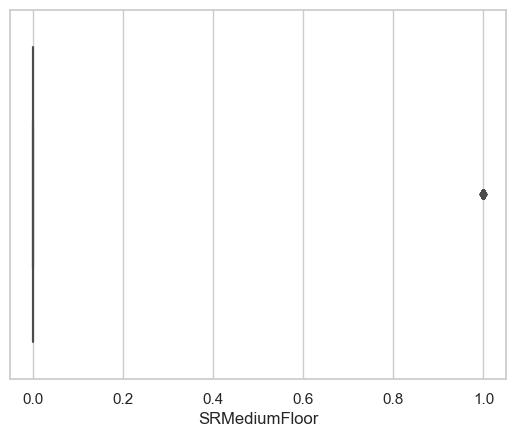

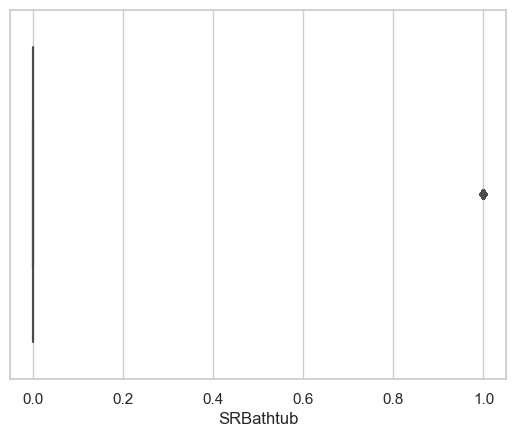

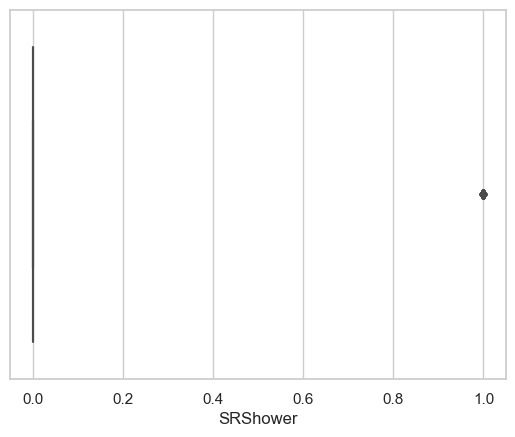

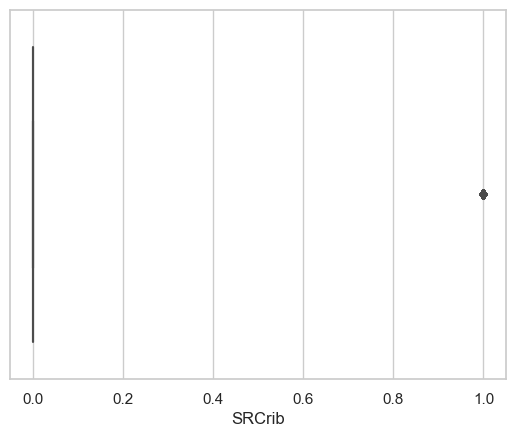

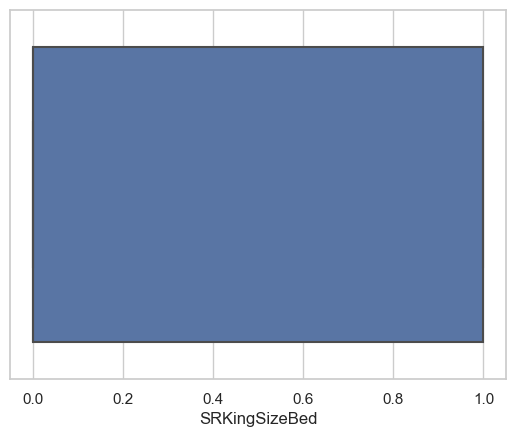

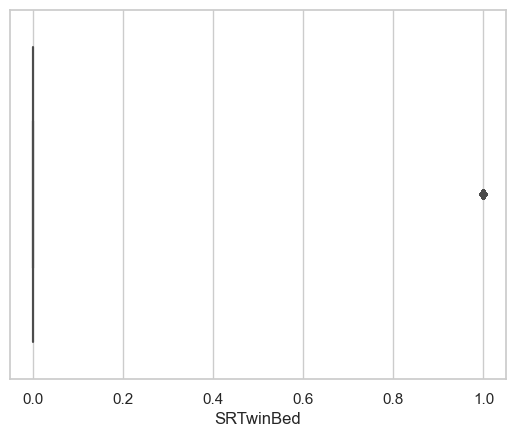

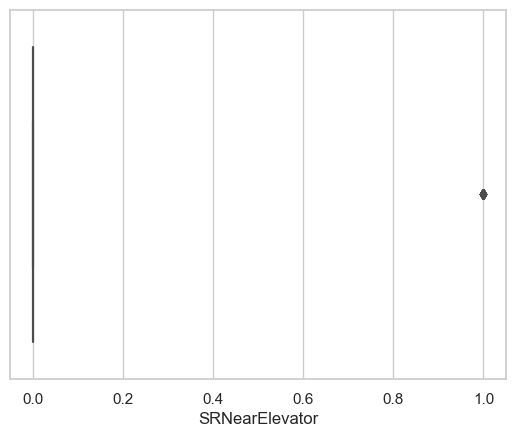

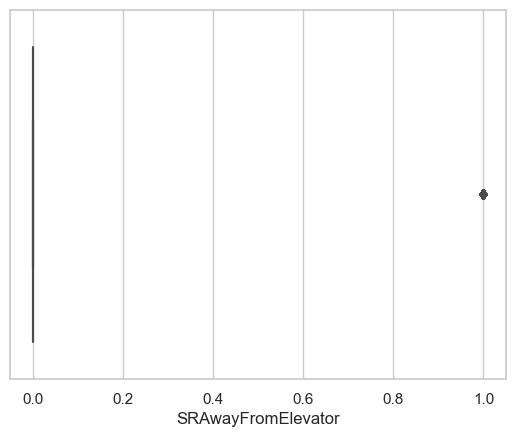

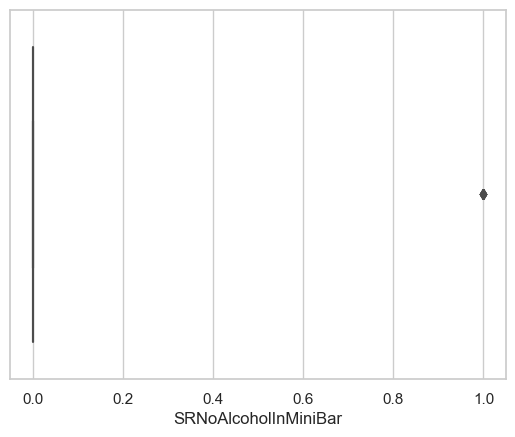

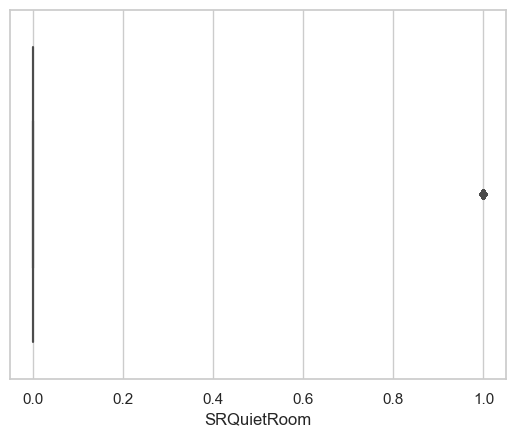

In [16]:
splot_cols=df_train.columns
for i in splot_cols:
    if df_train[i].dtype != 'object' and df_train[i].isnull().values.any() != True:
        st.write(sns.boxplot(df_train[i]))
        plt.show()

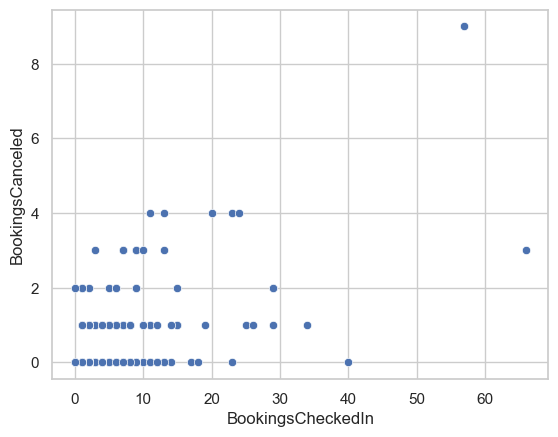

In [17]:
sns.scatterplot(x="BookingsCheckedIn",y="BookingsCanceled",data=df_train)
plt.show()

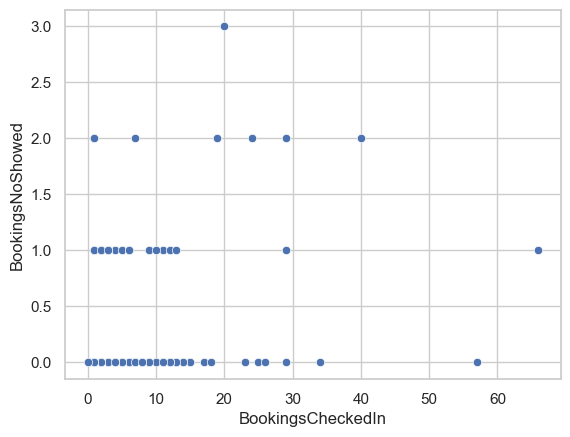

In [18]:
sns.scatterplot(x="BookingsCheckedIn",y="BookingsNoShowed",data=df_train)
plt.show()

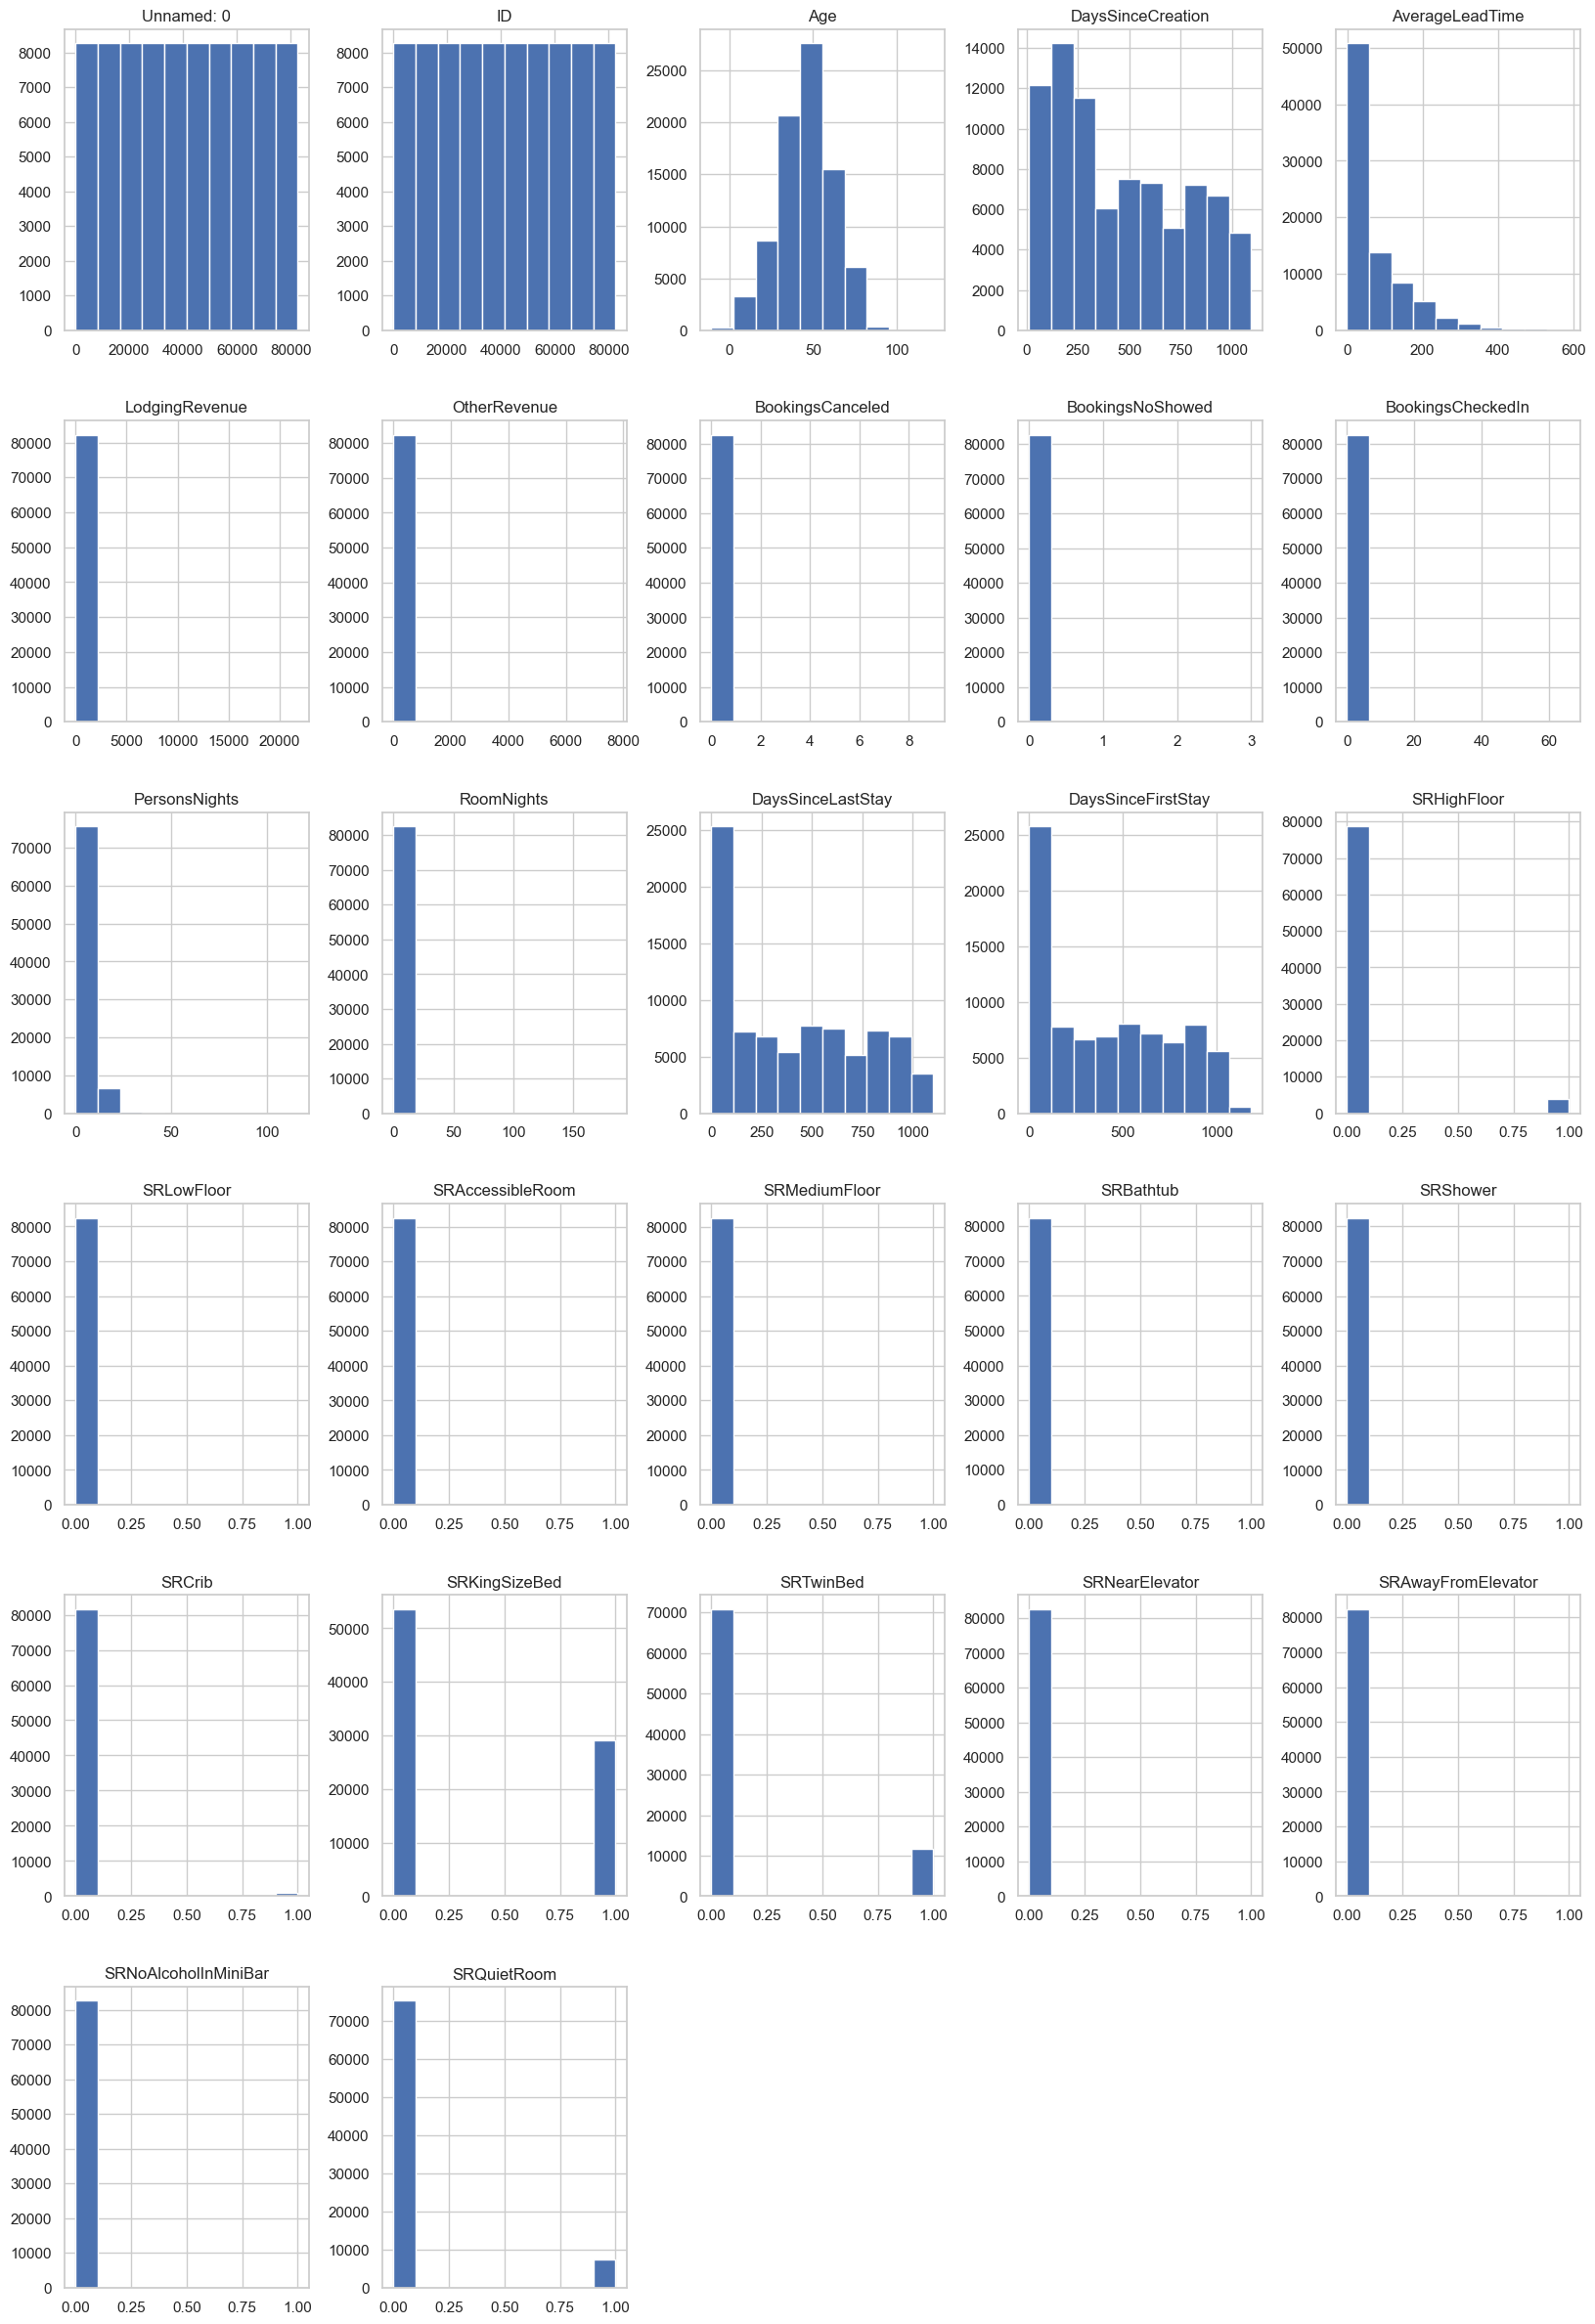

In [19]:
df_train.hist(figsize=(20,30));
plt.show()

In [20]:
# sns.pairplot(df_train,diag_kind='kde',palette="tab10")
# plt.show()

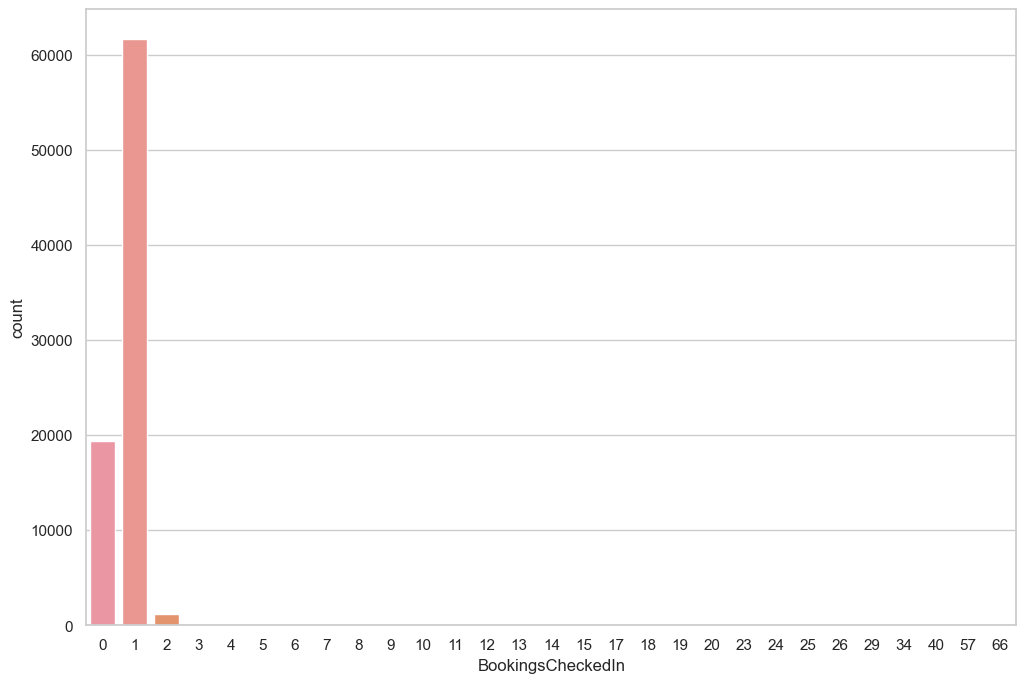

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(x = 'BookingsCheckedIn',data=df_train)
plt.show()

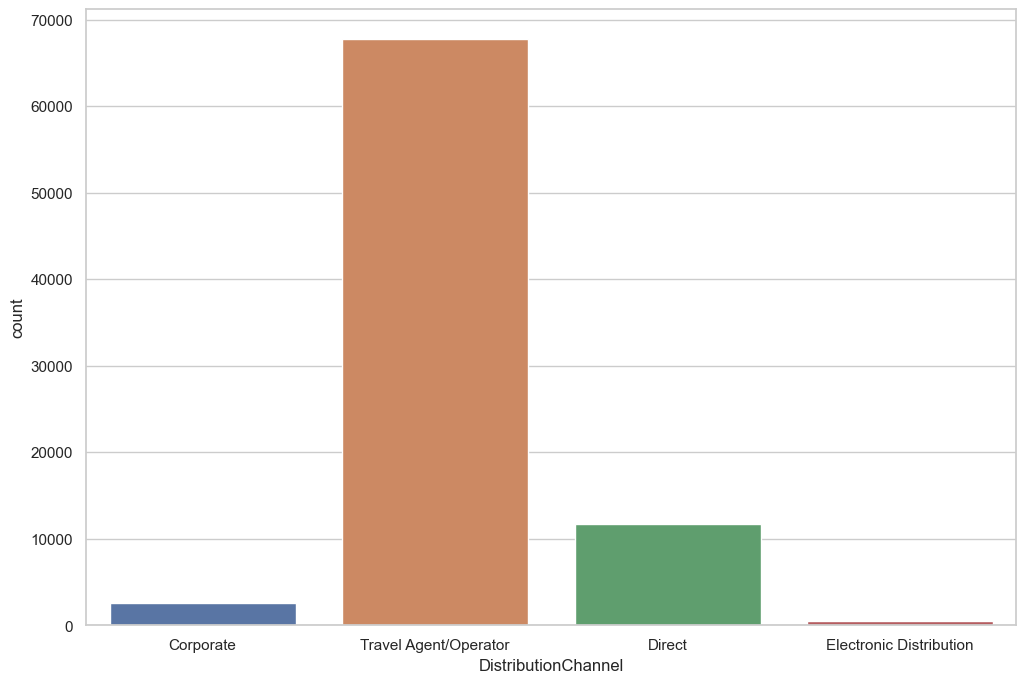

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='DistributionChannel',data=df_train)
plt.show()

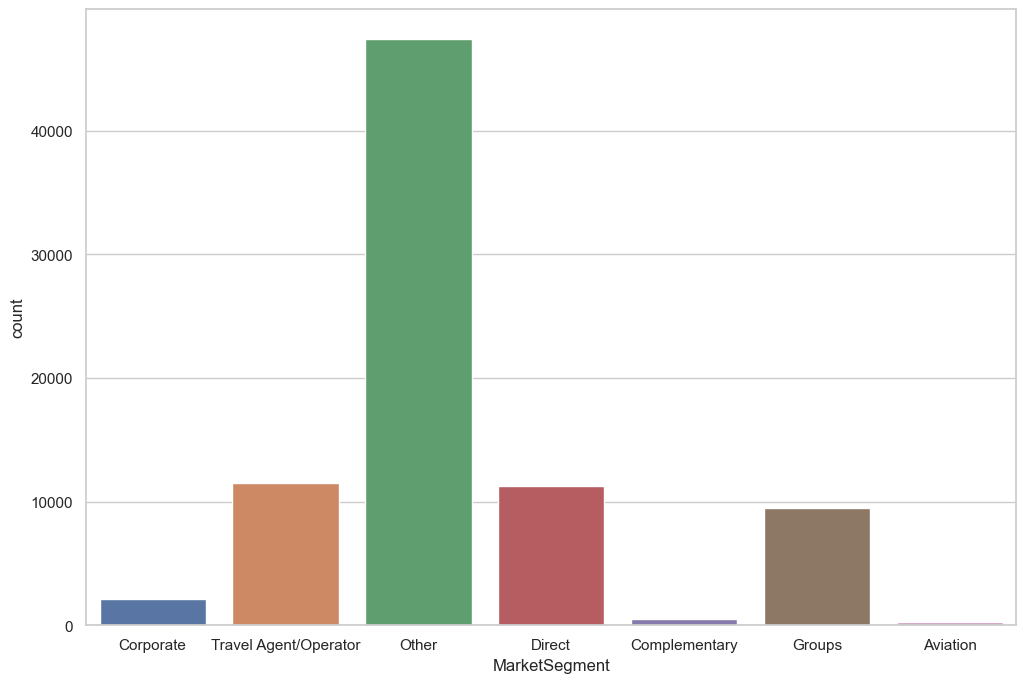

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x='MarketSegment',data=df_train)
plt.show()

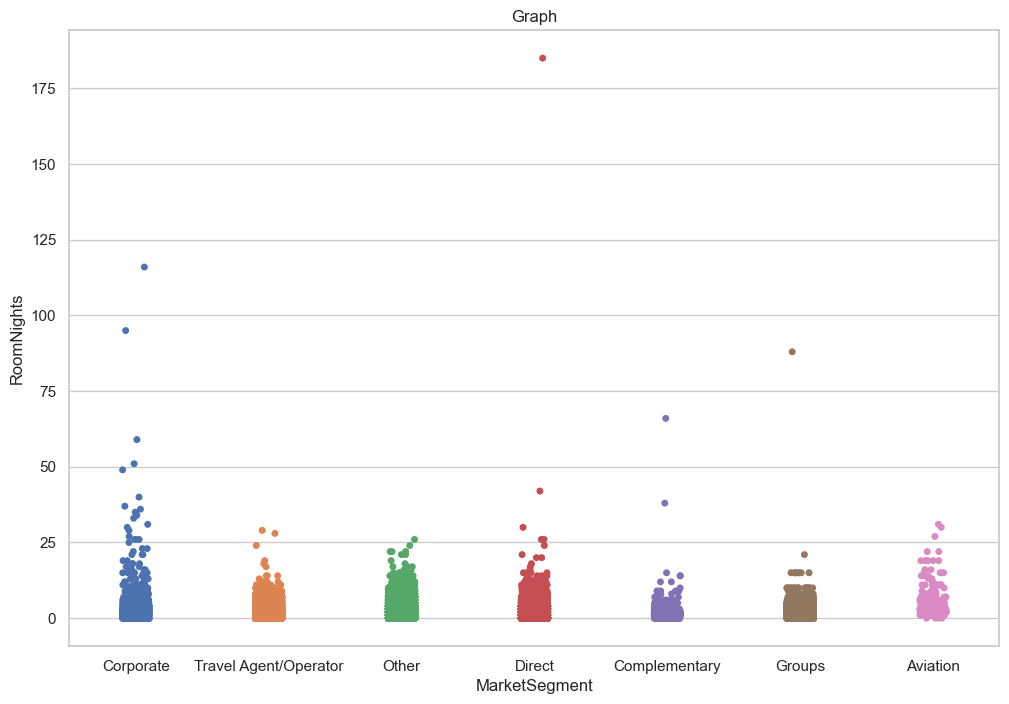

In [24]:
plt.figure(figsize=(12,8))
ax = sns.stripplot(x='MarketSegment', y='RoomNights', data=df_train)
plt.title('Graph')
plt.show()

###### More rooms where booked by the customers due to direct market segment and corporate booking.

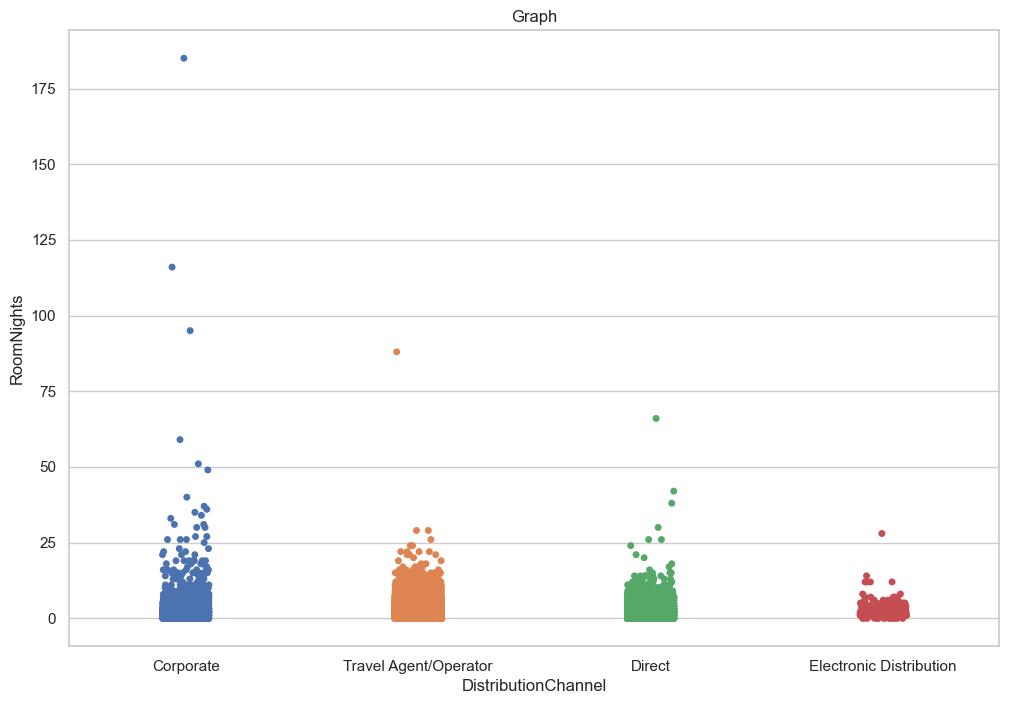

In [25]:
plt.figure(figsize=(12,8))
ax = sns.stripplot(x='DistributionChannel', y='RoomNights', data=df_train)
plt.title('Graph')
plt.show()

More rooms where booked for the corporate people.

In [26]:
df_train.columns

Index(['Unnamed: 0', 'ID', 'Nationality', 'Age', 'DaysSinceCreation',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [27]:
new_df_train = df_train.drop(['Unnamed: 0','ID','Nationality'],axis=1)
new_df_train.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,51.000000,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45.468554,1095,61,280.0,53.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,31.000000,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.000000,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,51.000000,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df_cat_train = new_df_train.select_dtypes(include = ['object'])
df_num_train = new_df_train.select_dtypes(include = ['float64','int64'])
df_cat_train.head()

,DistributionChannel,MarketSegment
0,Corporate,Corporate
1,Travel Agent/Operator,Travel Agent/Operator
2,Travel Agent/Operator,Travel Agent/Operator
3,Travel Agent/Operator,Travel Agent/Operator
4,Travel Agent/Operator,Travel Agent/Operator


In [29]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for i in df_cat_train.columns:
#     print(i)
    df_cat_train[i]= label_encoder.fit_transform(df_cat_train[i])
df_cat_train.head()

,DistributionChannel,MarketSegment
0,0,2
1,3,6
2,3,6
3,3,6
4,3,6


In [30]:
df_train_copy = pd.concat([df_cat_train,df_num_train],axis=1)
df_train_copy.head()

,DistributionChannel,MarketSegment,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,0,2,51.000000,150,45,371.0,105.3,1,0,3,8,5,151,1074,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,6,45.468554,1095,61,280.0,53.0,0,0,1,10,5,1100,1100,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,6,31.000000,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,6,60.000000,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,6,51.000000,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df_train_copy['BookingsCheckedIn'].value_counts()

1     61737
0     19394
2      1141
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64

In [32]:
df_train_copy['BookingsCheckedIn'] = np.where((df_train_copy['BookingsCheckedIn'] > 0), 1, 0)
df_train_copy['BookingsCheckedIn'].value_counts()

1    63186
0    19394
Name: BookingsCheckedIn, dtype: int64

In [33]:
df_train_copy.corr()

,DistributionChannel,MarketSegment,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
DistributionChannel,1.000000,0.784570,0.045825,0.017252,0.137050,-0.012317,0.006306,-0.079214,-0.058513,-0.007758,0.058714,0.013238,0.030694,0.016815,0.021644,-0.009085,0.000941,-0.015054,-0.015018,-0.021225,-0.036629,0.163508,0.073710,-0.000354,-0.015221,0.005014,0.090589
MarketSegment,0.784570,1.000000,0.023116,0.054697,0.138393,-0.025336,0.018982,-0.079278,-0.051525,-0.011373,0.082439,0.021503,0.055596,0.041184,0.020703,-0.007430,-0.000248,-0.015526,-0.011150,-0.014610,-0.026992,0.092822,0.022644,0.001430,-0.009678,0.003887,0.072152
Age,0.045825,0.023116,1.000000,0.122003,0.246580,0.049534,0.112200,0.004288,0.006293,0.194874,0.108719,0.122490,0.155527,0.156498,-0.034820,0.012580,0.006919,0.007020,-0.017079,0.010615,-0.115341,-0.003015,0.013391,0.012988,0.009428,-0.010679,0.013948
DaysSinceCreation,0.017252,0.054697,0.122003,1.000000,0.132253,0.085673,0.153800,0.018090,0.012581,0.415514,0.238082,0.228044,0.906897,0.910991,-0.025304,-0.007220,0.001808,0.004831,-0.010994,-0.006291,-0.036748,-0.027906,-0.025316,-0.002045,0.010351,-0.011250,-0.055090
AverageLeadTime,0.137050,0.138393,0.246580,0.132253,1.000000,0.213989,0.238732,-0.015530,-0.011905,0.419362,0.349180,0.313593,0.240568,0.236681,-0.021801,-0.003751,-0.001699,-0.000392,-0.006810,0.008143,-0.039513,-0.014470,0.080111,0.000262,-0.000218,-0.006315,0.008595
LodgingRevenue,-0.012317,-0.025336,0.049534,0.085673,0.213989,1.000000,0.525288,0.070747,0.062404,0.445869,0.651218,0.690811,0.194200,0.203964,0.014946,0.004505,0.000159,0.005712,0.005081,0.011728,-0.015679,0.014073,0.010036,0.004305,0.012000,-0.000964,0.052264
OtherRevenue,0.006306,0.018982,0.112200,0.153800,0.238732,0.525288,1.000000,0.043721,0.034086,0.328504,0.529203,0.477174,0.224432,0.231602,0.001598,0.004479,0.000483,0.007167,0.009703,0.011356,0.002525,0.013125,0.015287,0.001098,0.011606,0.004913,0.016047
BookingsCanceled,-0.079214,-0.079278,0.004288,0.018090,-0.015530,0.070747,0.043721,1.000000,0.314690,0.016027,0.087124,0.198184,-0.009863,0.022468,-0.005110,-0.001152,-0.000486,0.023356,-0.001617,-0.001269,-0.003471,0.017958,-0.007280,-0.000530,0.004246,-0.000335,-0.006286
BookingsNoShowed,-0.058513,-0.051525,0.006293,0.012581,-0.011905,0.062404,0.034086,0.314690,1.000000,0.011962,0.066664,0.149335,-0.004555,0.013749,-0.004823,-0.000817,-0.000344,-0.000642,-0.001146,-0.000899,-0.002460,0.011400,-0.000660,-0.000376,-0.001288,-0.000238,-0.003834
BookingsCheckedIn,-0.007758,-0.011373,0.194874,0.415514,0.419362,0.445869,0.328504,0.016027,0.011962,1.000000,0.566825,0.575303,0.650647,0.652936,-0.024095,-0.006267,0.005253,0.002061,-0.005135,0.000401,-0.057540,-0.015177,-0.030793,0.003073,0.005675,-0.006884,-0.008988


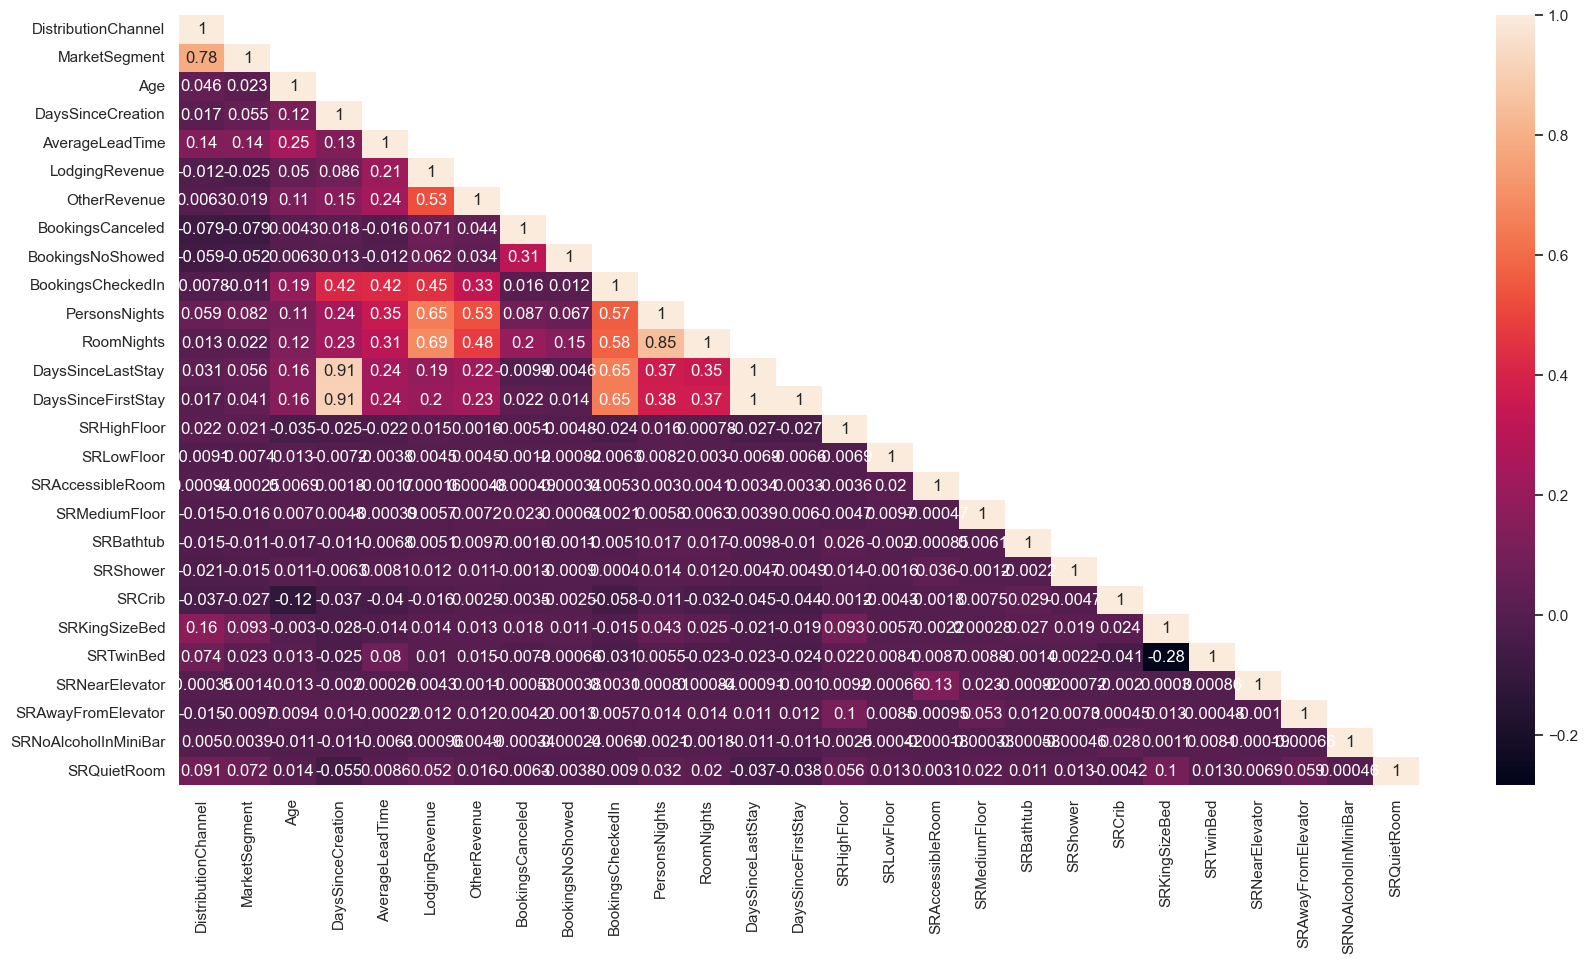

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train_copy.corr(), annot=True,mask=np.triu(df_train_copy.corr(),+1))
plt.show()

In [35]:
x = df_train_copy.drop('BookingsCheckedIn', axis=1)
y = df_train_copy['BookingsCheckedIn']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(df_train_copy, y, test_size=0.3 , random_state=42,stratify=y)
x_train.shape

(57806, 27)

In [37]:
from sklearn.neural_network import MLPClassifier
ANN_wgs = MLPClassifier(random_state=42)
ANN_wgs.fit(x_train, y_train)

MLPClassifier(random_state=42)

In [38]:
ytrain_predict = ANN_wgs.predict(x_train)
ytrain_predict

array([1, 1, 0, ..., 1, 0, 1])

In [39]:
ytest_predict = ANN_wgs.predict(x_test)
ytest_predict

array([1, 0, 0, ..., 1, 1, 1])

In [40]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13576
           1       1.00      1.00      1.00     44230

    accuracy                           1.00     57806
   macro avg       1.00      1.00      1.00     57806
weighted avg       1.00      1.00      1.00     57806
 



In [41]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00     18956

    accuracy                           1.00     24774
   macro avg       1.00      1.00      1.00     24774
weighted avg       1.00      1.00      1.00     24774
 



### ANN with grid search

In [42]:
param_grid_ANN = { 'hidden_layer_sizes': [93,95,97,99,102,105],
                  'activation': [ 'relu','adam'], 
                  'max_iter': [10000,12500], 
                  'solver': ['adam'], 
                  'tol': [0.00001,0.0001], }
ANN = MLPClassifier(random_state=42)


In [43]:
grid_search_ANN = GridSearchCV(estimator = ANN, param_grid = param_grid_ANN, cv = 3)
grid_search_ANN.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'adam'],
                         'hidden_layer_sizes': [93, 95, 97, 99, 102, 105],
                         'max_iter': [10000, 12500], 'solver': ['adam'],
                         'tol': [1e-05, 0.0001]})

In [44]:
grid_search_ANN.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 95,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 1e-05}

In [45]:
best_grid_ANN = grid_search_ANN.best_estimator_
best_grid_ANN

MLPClassifier(hidden_layer_sizes=95, max_iter=10000, random_state=42, tol=1e-05)

In [46]:
ytrain_predict = best_grid_ANN.predict(x_train)
ytrain_predict

array([1, 1, 0, ..., 1, 0, 1])

In [47]:
ytest_predict = best_grid_ANN.predict(x_test)
ytest_predict

array([1, 0, 0, ..., 1, 1, 1])

In [48]:
print(classification_report(y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13576
           1       1.00      1.00      1.00     44230

    accuracy                           1.00     57806
   macro avg       1.00      1.00      1.00     57806
weighted avg       1.00      1.00      1.00     57806
 



In [49]:
print(classification_report(y_test, ytest_predict),'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5818
           1       1.00      1.00      1.00     18956

    accuracy                           1.00     24774
   macro avg       1.00      1.00      1.00     24774
weighted avg       1.00      1.00      1.00     24774
 



In [50]:
df_test = pd.read_csv("test_data_evaluation_part2.csv")
df_test.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,1,15,5,16,16,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0


In [51]:
df_test.shape

(1000, 30)

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Nationality           1000 non-null   object 
 3   Age                   967 non-null    float64
 4   DaysSinceCreation     1000 non-null   int64  
 5   AverageLeadTime       1000 non-null   int64  
 6   LodgingRevenue        1000 non-null   float64
 7   OtherRevenue          1000 non-null   float64
 8   BookingsCanceled      1000 non-null   int64  
 9   BookingsNoShowed      1000 non-null   int64  
 10  BookingsCheckedIn     1000 non-null   int64  
 11  PersonsNights         1000 non-null   int64  
 12  RoomNights            1000 non-null   int64  
 13  DaysSinceLastStay     1000 non-null   int64  
 14  DaysSinceFirstStay    1000 non-null   int64  
 15  DistributionChannel   

In [53]:
df_test['BookingsCanceled'].value_counts()

0    1000
Name: BookingsCanceled, dtype: int64

In [54]:
df_test['BookingsNoShowed'].value_counts()

0    1000
Name: BookingsNoShowed, dtype: int64

In [55]:
df_test['BookingsCheckedIn'].value_counts()

0    521
1    473
2      6
Name: BookingsCheckedIn, dtype: int64

In [56]:
df_test.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,1000.000000,1000.000000,967.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000
mean,83089.500000,83090.500000,39.720786,4.100000,36.840000,163.522530,42.612590,0.0,0.0,0.485000,3.094000,1.464000,2.980000,2.994000,0.045000,0.0,0.0,0.0,0.006000,0.0,0.047000,0.440000,0.125000,0.003000,0.0,0.0,0.115000
std,288.819436,288.819436,19.161205,3.124702,66.375508,302.384328,96.491848,0.0,0.0,0.511896,4.702901,2.094538,4.897099,4.898771,0.207408,0.0,0.0,0.0,0.077266,0.0,0.211745,0.496635,0.330884,0.054717,0.0,0.0,0.319182
min,82590.000000,82591.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,82839.750000,82840.750000,25.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,83089.500000,83090.500000,42.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,83339.250000,83340.250000,53.000000,6.000000,41.250000,252.000000,42.000000,0.0,0.0,1.000000,5.000000,2.000000,6.000000,6.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000
max,83589.000000,83590.000000,90.000000,11.000000,340.000000,3104.000000,1139.500000,0.0,0.0,2.000000,30.000000,15.000000,19.000000,19.000000,1.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [57]:
for column in df_test.columns:
    if df_test[column].dtype != 'object':
        mean = df_test[column].mean()
        df_test[column] = df_test[column].fillna(mean)    
        
df_test.isnull().sum() 

Unnamed: 0              0
ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [58]:
test_file_ids = df_test['ID']
new_df_test = df_test.drop(['Unnamed: 0','ID','Nationality'],axis=1)
new_df_test.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,47.000000,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16.000000,11,130,483.48,155.1,0,0,1,15,5,16,16,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15.000000,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12.000000,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
4,39.720786,11,0,0.00,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0


In [59]:
df_cat_test = new_df_test.select_dtypes(include = ['object'])
df_num_test = new_df_test.select_dtypes(include = ['float64','int64'])
df_cat_test.head()

,DistributionChannel,MarketSegment
0,Travel Agent/Operator,Other
1,Travel Agent/Operator,Other
2,Travel Agent/Operator,Other
3,Travel Agent/Operator,Other
4,Travel Agent/Operator,Other


In [60]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
for i in df_cat_test.columns:
#     print(i)
    df_cat_test[i]= label_encoder.fit_transform(df_cat_test[i])
df_cat_test.head()

,DistributionChannel,MarketSegment
0,3,4
1,3,4
2,3,4
3,3,4
4,3,4


In [61]:
df_test_copy = pd.concat([df_cat_test,df_num_test],axis=1)
df_test_copy.head()

,DistributionChannel,MarketSegment,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,3,4,47.000000,11,0,0.00,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,4,16.000000,11,130,483.48,155.1,0,0,1,15,5,16,16,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,4,15.000000,11,0,0.00,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4,12.000000,11,0,0.00,0.0,0,0,0,0,0,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,4,39.720786,11,0,0.00,0.0,0,0,0,0,0,-1,-1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [62]:
df_test_copy['BookingsCheckedIn'].value_counts()

0    521
1    473
2      6
Name: BookingsCheckedIn, dtype: int64

In [63]:
df_test_copy['BookingsCheckedIn'] = np.where((df_test_copy['BookingsCheckedIn'] > 0), 1, 0)
df_test_copy['BookingsCheckedIn'].value_counts()

0    521
1    479
Name: BookingsCheckedIn, dtype: int64

In [64]:
final_predictions = best_grid_ANN.predict(df_test_copy)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission["Unnamed 0"].value_counts()
# submission.rename(columns={"Unnamed 0": "Loan_Status"},inplace=True)
# submission.to_csv('submission.csv',index = False)

0    524
1    476
Name: Unnamed 0, dtype: int64

In [66]:
!streamlit run "C:\Users\Hp\Downloads\hackathon 7\Untitled.ipynb"

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Streamlit requires raw Python (.py) files, not .ipynb.
For more information, please see https://docs.streamlit.io
